<a href="https://colab.research.google.com/github/Alexanderdivv/my-libOnPython/blob/intro/introOpenCv%2BWatershed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2

In [ ]:
print(cv2.__version__)

4.1.2


In [ ]:
import os

# bash/command line di colab
1. gunakan tanda ! atau % sebagai awalan
2. selebihnya untuk instruksi, gunakan perintah seperti biasa

In [ ]:
!pwd

/content


In [ ]:
# menjadikan gambar menjadi folder untuk ruang kerja. keknya hampir mirip sama cd
os.chdir('gambar')

In [ ]:
os.getcwd()

'/content/gambar'

In [ ]:
os.listdir()

['ss1.png', '.ipynb_checkpoints']

# Contoh 1

In [ ]:
citraRGB = cv2.imread('ss1.png')

In [ ]:
citraAbu2 = cv2.cvtColor(citraRGB, cv2.COLOR_BGR2GRAY)

In [ ]:
from google.colab.patches import cv2_imshow
cv2.imshow('Gambar berwarna', citraRGB)

DisabledFunctionError: ignored

testing

# Watershed

In [ ]:
# import library
import numpy as np
import cv2 as cv

In [ ]:
from matplotlib import pyplot as plt

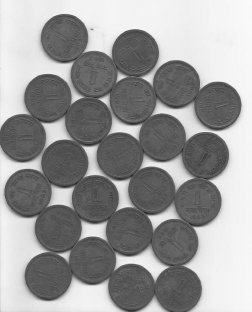

In [ ]:
img = cv.imread('water_coins.jpg')
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
from google.colab.patches import cv2_imshow
cv2_imshow(gray)

In [ ]:
# 2 parameter (ukuran nilai dan image hasil)
ret, thresh = cv.threshold(gray, 0,255, cv.THRESH_BINARY_INV+cv.THRESH_OTSU)

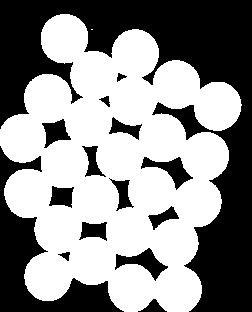

In [ ]:
cv2_imshow(thresh)

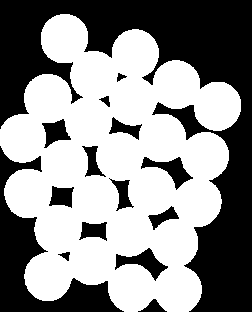

In [ ]:
# morphological opeing to remove small holes
# noise removal 
kernel = np.ones((3,3), np.uint8)
opening = cv.morphologyEx(thresh, cv.MORPH_OPEN, kernel, iterations = 2)
cv2_imshow(opening)

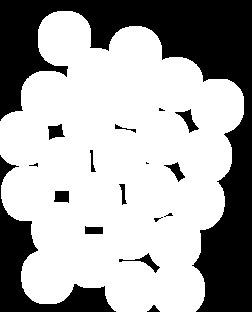

In [ ]:
#sure background area
sure_bg = cv.dilate(opening, kernel, iterations = 3)
cv2_imshow(sure_bg)

In [ ]:
#finding sure foreground area
dist_transform = cv.distanceTransform(opening, cv.DIST_L2, 5)
ret, sure_fg = cv.threshold(dist_transform, 0.7*dist_transform.max(), 255, 0)

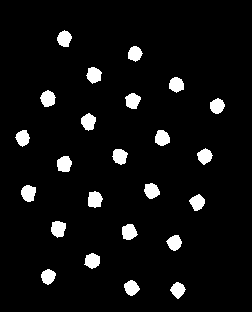

In [ ]:
cv2_imshow(sure_fg)

In [ ]:
# finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv.subtract(sure_bg, sure_fg)

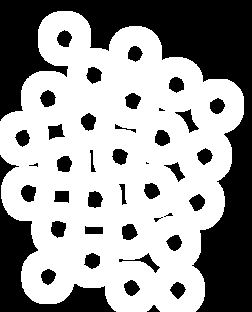

In [ ]:
cv2_imshow(unknown)

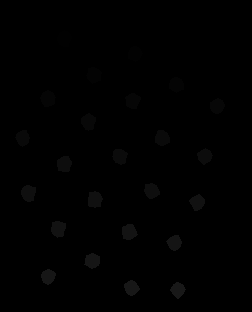

In [ ]:
#marker labeling
ret, markers = cv.connectedComponents(sure_fg)
cv2_imshow(markers)

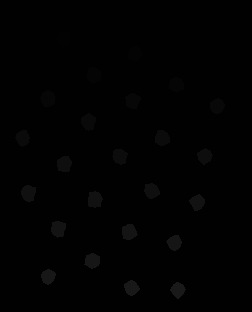

In [ ]:
#add one to all labels so that sure background is not 0, but 1
markers = markers + 1
cv2_imshow(markers)

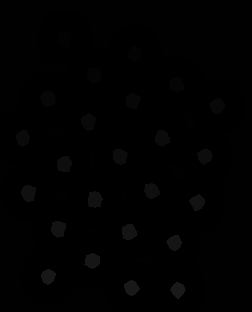

In [ ]:
#now, mark the region of unknown with zero
markers[unknown == 255] = 0
cv2_imshow(markers)

In [ ]:
markers = cv.watershed(img, markers)
img[markers == -1] = [255,0,0]

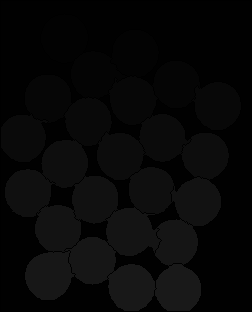

In [ ]:
cv2_imshow(markers)

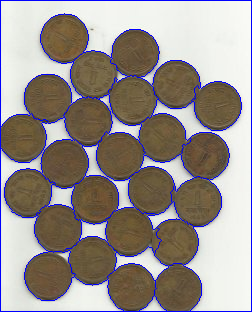

In [ ]:
cv2_imshow(img)


# Watershed 2
source: https://pyimagesearch.com/2015/11/02/watershed-opencv/

In [ ]:
#import library penting
from __future__ import print_function
from skimage.feature import peak_local_max
from skimage.morphology import watershed
from scipy import ndimage
import argparse
import imutils
import cv2

In [ ]:
# construct the argument parse and parse the argument
ap = argparse.ArgumentParser()
ap.add_argument("-i", "--image", required=True,
                help = "path to input image")
args = vars(ap.parse_args())

usage: ipykernel_launcher.py [-h] -i IMAGE
ipykernel_launcher.py: error: the following arguments are required: -i/--image


SystemExit: ignored

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2890: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
